# Plotting the graphs for analysis

## Directory Path

In [1]:
dr_path = '/scratch/network/hishimwe/'

## Choose the type of model you are plotting

In [2]:
graph = 'losses'

## Name of the model

In [3]:
model = '30epochs_l2_lr_0.1_wd_1e-07'

## Full Path

In [4]:
train_path = dr_path + graph + '/train/train_' + model
val_path = dr_path + graph + '/val/val_' + model

print(train_path)
print(val_path)

/scratch/network/hishimwe/losses/train/train_30epochs_l2_lr_0.1_wd_1e-07
/scratch/network/hishimwe/losses/val/val_30epochs_l2_lr_0.1_wd_1e-07


## Graph name

In [5]:
name = graph + '_' + model + ".png"
saving_path = 'graphs/' + graph + "/" + name

print(name)
print(saving_path)

losses_30epochs_l2_lr_0.1_wd_1e-07.png
graphs/losses/losses_30epochs_l2_lr_0.1_wd_1e-07.png


In [6]:
## For losses and accuracies plots 
def plotting_1(graph_type, train_path, val_path, graph_path):
    # axis labels and title
    title = ''
    y_label = ''
    if graph_type == 'losses':
        title = "Training and Validation Losses"
        y_label = "Loss"
    elif graph_type == 'accuracies':
        title = "Training and Validation Accuracies"
        y_label = "Accuracy"
    
    # training
    file_train = open(train_path,'r')
    loss_train = file_train.readlines()
    loss_train = np.array(loss_train) 
    loss_train = np.asfarray(loss_train, dtype=float) # converting to floats

    # validation
    file_val = open(val_path,'r')
    loss_val = file_val.readlines()
    loss_val = np.array(loss_val) 
    loss_val = np.asfarray(loss_val, dtype=float) # converting to floats

    epochs = np.arange(len(loss_train)) # number of epochs run

    plt.plot(epochs, loss_train, color="blue", label="Train" + y_label)
    plt.plot(epochs, loss_val, color="green", label="Validation" + y_label)
    print(title)
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel(y_label)
    if graph_type == 'losses':
        plt.ylim((0,8)) # CHANGE THIS IF THE Y AXIS IS TOO SHORT
    elif graph_type == 'accuracies': 
        plt.ylim((0,1))
    plt.legend()
    plt.savefig(graph_path)
    plt.show()

In [7]:
## For Average_precision plots
def plotting_2(train_path, val_path, graph_path):
    # training 
    file_train = open(train_path,'r')
    prec_train = file_train.readlines()

    num_epochs = len(prec_train)
    avg_precisions_train = np.zeros((num_epochs,))

    for i in range(num_epochs):
        l = np.array(prec_train[i].split(",")) # separate the values
        l = np.asfarray(l, dtype=float) # convert to floats
        avg_precisions_train[i] = np.average(l) # save average


    # validation
    file_val = open(val_path,'r')
    prec_val = file_val.readlines()

    avg_precisions_val = np.zeros((num_epochs,))

    for i in range(num_epochs):
        l = np.array(prec_val[i].split(",")) # separate the values
        l = np.asfarray(l, dtype=float) # convert to floats
        avg_precisions_val[i] = np.average(l) # save average

    epochs = np.arange(num_epochs) # number of epochs run

    plt.plot(epochs, avg_precisions_train, color="b", label="Train Average Precision")
    plt.plot(epochs, avg_precisions_val, color="green", label="Validation Average Precision")
    plt.title("Training and Validation Average Precisions")
    plt.xlabel("Epochs")
    plt.ylabel("Average Precisions")
    plt.ylim((0,1))
    plt.legend()
    plt.savefig(graph_path)
    plt.show()

## Graphing

In [8]:
import numpy as np
import matplotlib.pyplot as plt 

Training and Validation Losses


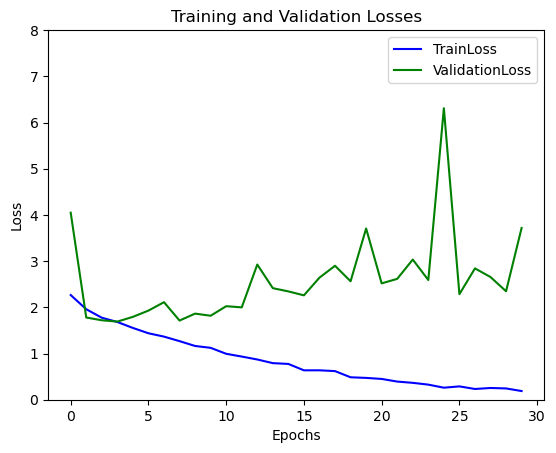

In [9]:
if graph == 'precisions':
    plotting_2(train_path, val_path, graph_path = saving_path)
else:
    plotting_1(graph_type = graph, train_path = train_path, val_path = val_path, graph_path = saving_path)